In [1]:
%cd /home/smalani/Cybernetic/growthcurvefit/
import pandas as pd

/home/smalani/Cybernetic/growthcurvefit


In [2]:
df = pd.read_csv('/home/smalani/Cybernetic/growthcurvefit/data/OptoQAMP1-PDC1-SGy128-4.csv')

# import opto_fit_mu_baranyi as ofmb

# reactor_arr = ['M0-1', 'M1-1', 'M2-1', 'M3-1', 'M4-1', 'M5-1', 'M6-1', 'M7-1', 
#                'M0-2', 'M1-2', 'M2-2', 'M3-2', 'M4-2', 'M5-2', 'M6-2', 'M7-2']
# fixed_xmax = False
# output = ofmb.mu_fit(df, reactor_arr, fixed_xmax=fixed_xmax)
# print(output)


import opto_fit_mu_baranyi as ofmb

reactor_arr = ['M0-1', 'M1-1', 'M2-1', 'M3-1', 'M4-1', 'M5-1', 'M6-1', 'M7-1', 
               'M0-2', 'M1-2', 'M2-2', 'M3-2', 'M4-2', 'M5-2', 'M6-2', 'M7-2']

# reactor_arr = ['M4-2']

fixed_xmax = False
output = ofmb.mu_fit_sequential(df, reactor_arr)
print(output[0:-1])
print(output[-1])

  0%|          | 0/16 [00:00<?, ?it/s]

fitting mus sequentially


100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

(array([0.07654071, 0.26858448, 0.28688688, 0.19000113, 0.3834206 ,
       0.42503585, 0.25622547, 0.26932193, 0.30298274, 0.29615459,
       0.28158447, 0.26857221, 0.34449419, 0.38737338, 0.412247  ,
       0.43290314]), array([ 0.        , 39.88279932, 19.98011315, 14.4137813 ,  0.        ,
        2.18260617,  0.        ,  1.21280087, 10.40812555,  7.77763666,
       21.22069601, 19.70771971,  1.68719277,  3.11811039,  2.52691981,
        2.30179095]), array([ 9.99869826, 10.53208446,  9.40846458, 10.93737206, 13.90406803,
       12.25661864, 11.21044787, 10.76284163, 11.08229665,  8.78566496,
        8.64296761,  9.63645525, 12.96971352, 11.63048096, 12.04354596,
       13.49009548]))
[      fun: 0.051371821507731105
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.26741975e-06, 7.24566240e-04, 6.93889333e-09])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 236
      nit: 34
     njev: 59
   status: 0
  success: True
        x: a

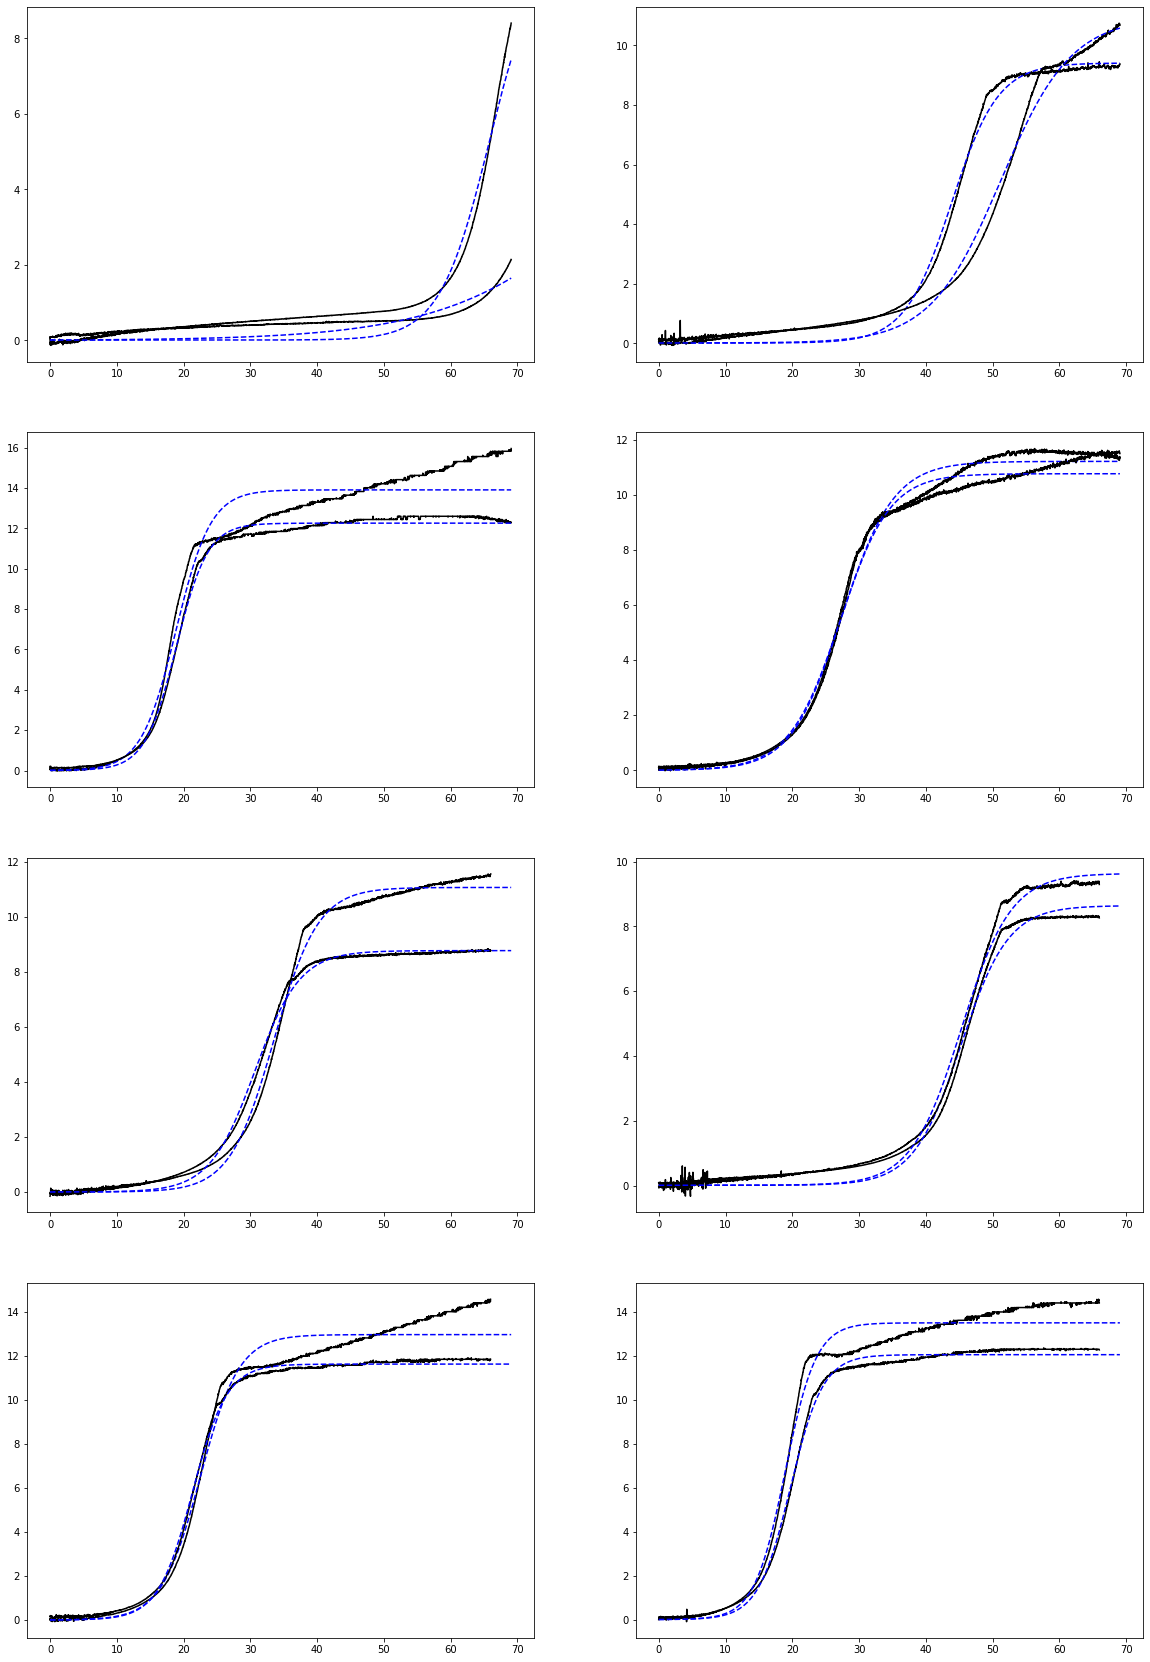

In [3]:
import matplotlib.pyplot as plt
import numpy as np

mu_SGy128_4_lights = np.array([0, 0, 0.01, 0.01, 0.1, 0.1, 1, 1, 0.03, 0.03, 0.01, 0.01, 0.06, 0.06, 0.08, 0.08])

fig, ax = plt.subplots(4, 2, figsize=(20,30))

mu_maxs = output[0]
lambdas = output[1]
xmaxs = output[2]
x0 = 0.01

error = 0
for i in range(len(lambdas)):
    lambd = lambdas[i]
    mu_max = mu_maxs[i]
    if fixed_xmax:
        xmax = xmaxs[0]
    else:
        xmax = xmaxs[i]
    t_arr = df['Time'].iloc[:df[reactor_arr[i]].size]
    x_t = ofmb.baranyifun(t_arr, [mu_max, x0, xmax, lambd])
    ax[int(i/2)//2, int(i/2)%2].plot(df['Time'], df[reactor_arr[i]], 'k-', label=reactor_arr[i])
    ax[int(i/2)//2, int(i/2)%2].plot(t_arr, x_t, 'b--')

In [4]:
df = pd.read_csv('/home/smalani/Cybernetic/growthcurvefit/data/OptoQINVRT4-PDC1-SGy104-1.csv')

# import opto_fit_mu_baranyi as ofmb

# reactor_arr = ['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 
#                ]
# fixed_xmax = False
# output = ofmb.mu_fit(df, reactor_arr, fixed_xmax=fixed_xmax)
# print(output)


import opto_fit_mu_baranyi as ofmb

reactor_arr = ['M0-1', 'M1-1', 'M2-1', 'M3-1', 'M4-1', 'M5-1', 'M6-1', 'M7-1', 
               'M0-2', 'M1-2', 'M2-2', 'M3-2', 'M4-2', 'M5-2', 'M6-2', 'M7-2']
fixed_xmax = False
output = ofmb.mu_fit_sequential(df, reactor_arr)
print(output[0:-1])
print(output[-1])

  0%|          | 0/16 [00:00<?, ?it/s]

fitting mus sequentially


100%|██████████| 16/16 [00:07<00:00,  2.10it/s]

(array([0.43100831, 0.43193865, 0.42946854, 0.47031774, 0.24842246,
       0.22532401, 0.07234959, 0.06286048, 0.49323195, 0.49237971,
       0.44437792, 0.41743772, 0.44698787, 0.46042934, 0.41595666,
       0.32797421]), array([11.20553273, 10.40786669, 10.05720172, 10.61147041, 14.92451955,
       14.63531428,  0.        ,  0.        ,  2.40502486,  2.42325459,
        0.63464526,  0.        ,  3.89116128,  5.17430011,  6.39490227,
        3.58883098]), array([10.37331445, 12.42019185, 10.91746541, 10.34543439, 10.36574798,
       10.12428178,  9.99988182,  9.9999843 , 12.40053101, 11.90267314,
       13.00619624, 12.66292107, 14.03715096, 11.64578626, 12.40653375,
       11.10030086]))
[      fun: 0.0369177975429048
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 7.92421662e-06, -1.11022293e-07,  2.01227907e-07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 232
      nit: 36
     njev: 58
   status: 0
  success: True
        x: 

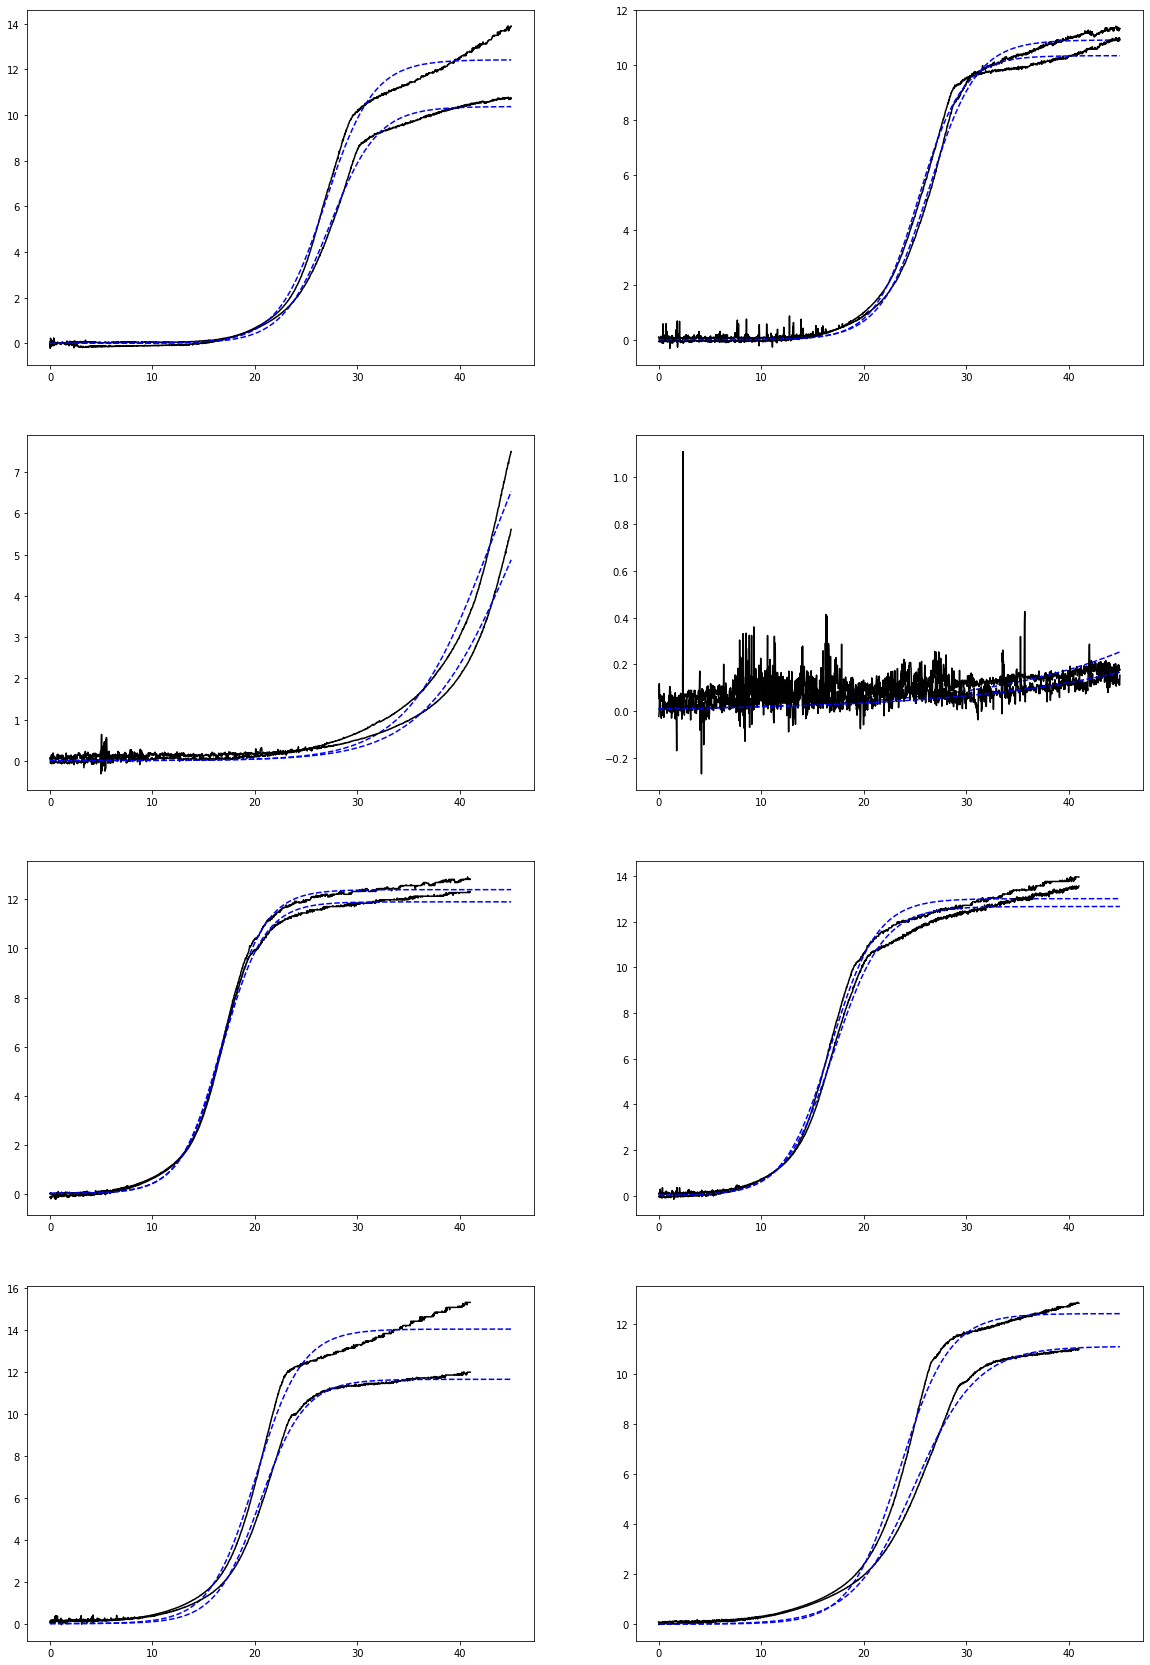

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(4, 2, figsize=(20,30))

mu_maxs = output[0]
lambdas = output[1]
xmaxs = output[2]
x0 = 0.01

error = 0
for i in range(len(lambdas)):
    lambd = lambdas[i]
    mu_max = mu_maxs[i]
    if fixed_xmax:
        xmax = xmaxs[0]
    else:
        xmax = xmaxs[i]
    t_arr = df['Time'].iloc[:df[reactor_arr[i]].size]
    x_t = ofmb.baranyifun(t_arr, [mu_max, x0, xmax, lambd])
    ax[int(i/2)//2, int(i/2)%2].plot(df['Time'], df[reactor_arr[i]], 'k-', label=reactor_arr[i])
    ax[int(i/2)//2, int(i/2)%2].plot(t_arr, x_t, 'b--')